# Electric potential and ExB Drift

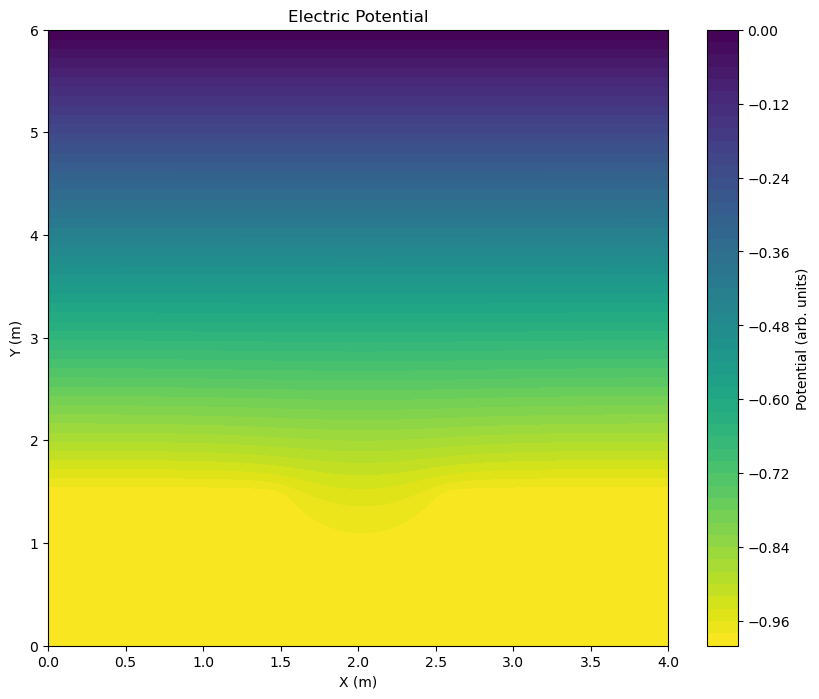

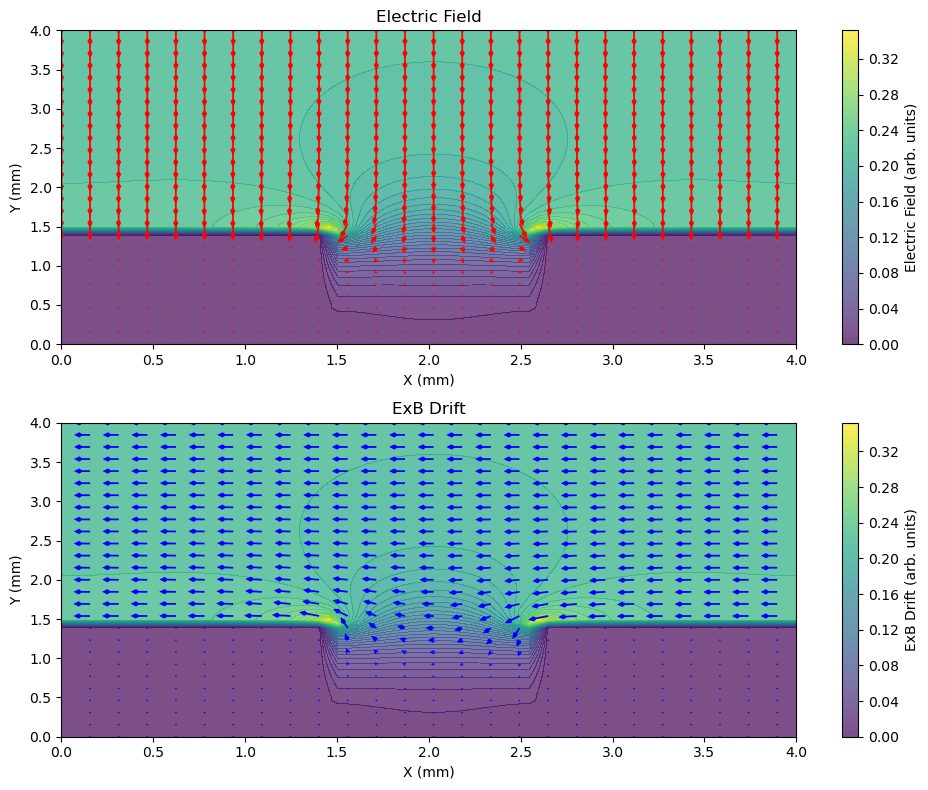

In [254]:
import numpy as np
import matplotlib.pyplot as plt

# File paths
potential_file = r'potential_data\potential_data.txt'
Ex_file = r'potential_data\Ex_data.txt'
Ey_file = r'potential_data\Ey_data.txt'
Vd_x_file = r'potential_data\Vd_x_data.txt'
Vd_y_file = r'potential_data\Vd_y_data.txt'

# Function to read data from file
def read_data(filename):
    return np.loadtxt(filename)

# Read potential data
potential = read_data(potential_file)

# Read electric field data
Ex = read_data(Ex_file)
Ey = read_data(Ey_file)

# Read ExB drift data
Vd_x = read_data(Vd_x_file)
Vd_y = read_data(Vd_y_file)

# Grid dimensions
Nx, Ny = potential.shape
x = np.linspace(0, 4.0, Nx)
y = np.linspace(0, 6.0, Ny)
X, Y = np.meshgrid(x, y)

# Plot potential
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, potential.T, levels=60, cmap='viridis_r')
plt.colorbar(label='Potential (arb. units)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Electric Potential')
plt.savefig("figures/fields_plots/potential_straight_pot_1.png")
plt.show()

# Correctly reshape Ex and Ey data
Ex = Ex.reshape((Nx-2, Ny-2))
Ey = Ey.reshape((Nx-2, Ny-2))

# Adjust the grid for the electric field data
x_e = np.linspace(0, 4.0, Nx-2)
y_e = np.linspace(0, 6.0, Ny-2)
X_e, Y_e = np.meshgrid(x_e, y_e)

# Reduce the density of the arrows by slicing the arrays
step = 3

X_e_dense = X_e[::step, ::step]
Y_e_dense = Y_e[::step, ::step]
Ex_dense = Ex[::step, ::step]
Ey_dense = Ey[::step, ::step]

# Plot electric field
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.contourf(X_e, Y_e, np.sqrt(Ex.T**2 + Ey.T**2), levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='Electric Field (arb. units)')

plt.quiver(X_e_dense, Y_e_dense, Ex_dense.T, Ey_dense.T, color='red', scale=10, headwidth=3, headlength=3)
plt.ylim([0, 4])
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Electric Field')

# Correctly reshape Vd_x and Vd_y data
Vd_x = Vd_x.reshape((Nx-2, Ny-2))
Vd_y = Vd_y.reshape((Nx-2, Ny-2))

# Define the step for the drift
step_drift = 3

# Reduce the density of the arrows by slicing the arrays
Vd_x_dense = Vd_x[::step_drift, ::step_drift]
Vd_y_dense = Vd_y[::step_drift, ::step_drift]
X_e_dense = X_e[::step_drift, ::step_drift]
Y_e_dense = Y_e[::step_drift, ::step_drift]

# Plot ExB drift
plt.subplot(2, 1, 2)
plt.contourf(X_e, Y_e, np.sqrt(Vd_x.T**2 + Vd_y.T**2), levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='ExB Drift (arb. units)')
plt.quiver(X_e_dense, Y_e_dense, Vd_x_dense.T, Vd_y_dense.T, color='blue', scale=10, headwidth=3, headlength=3)
plt.ylim([0, 4])
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('ExB Drift')

plt.tight_layout()
plt.savefig("figures/fields_plots/ExBDrift_E_straight_pot_1.png")
plt.show()